# Demo (Colab)

This notebook contains code to generate RF pulses with SLR and SLfRank. This is meant to be run on Colab. Otherwise, you should run `demo.ipynb`.

In [ ]:
!git clone https://github.com/MRSRL/slfrank
%cd slfrank
!pip install -r requirements.txt

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import slfrank
import sigpy as sp
import sigpy.mri.rf as rf

# Set parameters

In [3]:
# Use SigPy as solver
n = 64  # Pulse length
tb = 8  # Time bandwidth
d1 = 0.01  # Passband ripple
d2 = 0.01  # Stopband ripple
solver = 'PDHG'

# To use CVXPy as solver, comment out the following
# CVXPy gives more accurate solutions, but is much slower.
# if 'MOSEK' in cp.installed_solvers():
#     solver = 'MOSEK'
# else:
#     solver = 'SCS'
# n = 16  # Pulse length
# tb = 4  # Time bandwidth
# d1 = 0.01  # Passband ripple
# d2 = 0.01  # Stopband ripple

## Generate Pulses

Pulse Type:	ex
Phase:		linear



SLR:		Energy=0.31805496430224967	Peak=0.2081714423878843
SLfRank:	Energy=0.2588000498263858	Peak=0.18879261555080062


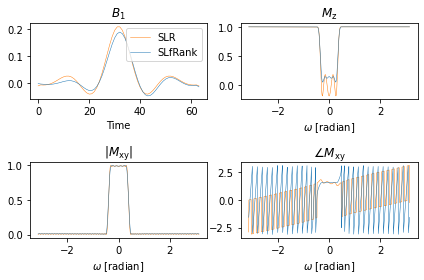

Pulse Type:	ex
Phase:		min



SLR:		Energy=0.31750783057295495	Peak=0.1867161955924386
SLfRank:	Energy=0.23415362538532714	Peak=0.16474447582694351


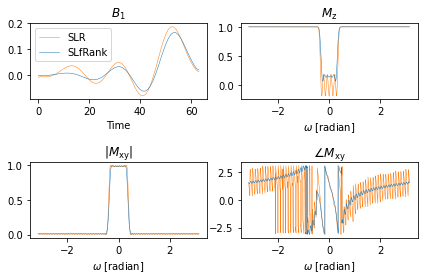

Pulse Type:	sat
Phase:		max



SLR:		Energy=0.3520533336550258	Peak=0.21152538830998166
SLfRank:	Energy=0.33349269174628193	Peak=0.20845268662559244


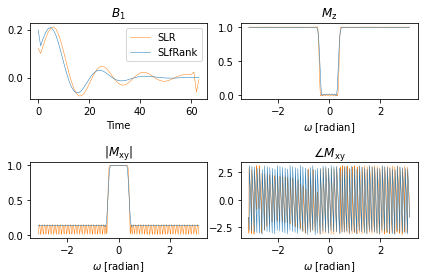

Pulse Type:	inv
Phase:		min



SLR:		Energy=2.9950849534115935	Peak=0.7805176849429784
SLfRank:	Energy=2.3051393211173528	Peak=0.6786259762204384


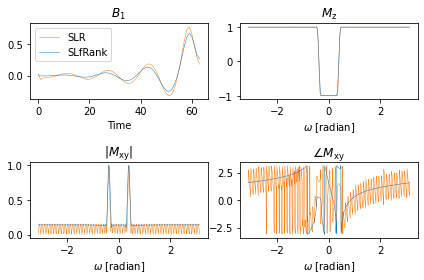

Pulse Type:	se
Phase:		linear



SLR:		Energy=2.73540298905502	Peak=0.827458237466556
SLfRank:	Energy=2.2273945861548334	Peak=0.715981548588925


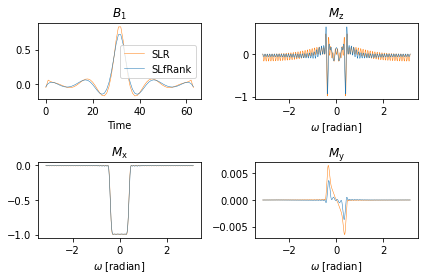

In [5]:
for ptype, phase in [('ex', 'linear'), ('ex', 'min'), ('sat', 'max'), ('inv', 'min'), ('se', 'linear')]:
    print(f'Pulse Type:\t{ptype}')
    print(f'Phase:\t\t{phase}')
    if phase == 'linear':
        ftype = 'pm'
    else:
        ftype = phase

    pulse_slr = rf.dzrf(n=n, tb=tb, ptype=ptype, ftype=ftype, d1=d1, d2=d2)
    pulse_slfrank = slfrank.design_rf(n=n, tb=tb, ptype=ptype, phase=phase,
                                      d1=d1, d2=d2, solver=solver)

    print(f'SLR:\t\tEnergy={np.sum(np.abs(pulse_slr)**2)}\tPeak={np.abs(pulse_slr).max()}')
    print(f'SLfRank:\tEnergy={np.sum(np.abs(pulse_slfrank)**2)}\tPeak={np.abs(pulse_slfrank).max()}')

    fig = slfrank.plot_slr_pulses(
        pulse_slr, pulse_slfrank, ptype=ptype, phase=phase, 
        omega_range=[-1, 1], tb=tb, d1=d1, d2=d2)
    plt.tight_layout()
    plt.show()
    fig.savefig(f'{ptype}_{phase}.pdf')